<a href="https://colab.research.google.com/github/vsvale/IGTI-Bootcamp-Desenvolvedor-Python/blob/main/IGTI_Mod_3_Pandas_Bike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bikes

O uso de bicicletas como um meio de transporte ganhou muita força nos últimos anos, seja por questões ambientais, de saúde ou até mesmo infraestrutura de trânsito. Para incentivar o uso de bicicletas, cidades em todo o mundo têm implementado programas de compartilhamento de bicicleta. Nesses sistemas, as bicicletas são retiradas e devolvidas em quiosques automatizados espalhados em diversos pontos da cidade.

As plataformas de compartilhamento de bicicletas costumam coletar diversos tipos de dados, entre eles: duração da viagem, localização inicial e final do percurso, entre outros. Esses dados coletados pela plataforma, em conjunto com informações sobre o clima, trânsito e relevo, por exemplo, torna possível uma análise mais robusta de compartilhamento de bicicletas.

A seguir, um descritivo dos dados coletados:

- rec_id: índice do registro;
- datetime : data
- season : estação do ano (1: inverno, 2: primevera, 3: verão, 4: outono);
- year : ano (0: 2011, 1:2012);
- month : mês (1 a 12);
- hour : hora do dia (0 a 23)
- is_holiday : booleano indicando feriado;
- weekday : dia da semana (0: domingo, ..., 6: sábado);
- is_workingday : booleano indicando dia útil;
- weather_condition: (1: limpo, 2: nublado, 3: chuva leve, 4: chuva forte);
- temp : Temperatura escalada entre 0 e 1. Valor original em graus Celsius: -8 a 39;
- atemp: Sensação térmica escalada entre 0 e 1. Valor original em graus Celsius: -16 a 50;
- humidity: Humidade relativa (0 a 1)
- windspeed: Velocidade do vento escalada entre 0 e 1 (máximo original: 67).
- casual: usuários casuais;
- registered: usuários registrados;
- total_count: contador total de alugueis (casual+registered).

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize']=(16,6)

In [ ]:
df = pd.read_csv("https://pycourse.s3.amazonaws.com/bike-sharing.csv")
df

,datetime,rec_id,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,2011-01-01,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2011-01-01,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,2011-01-01,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,2011-01-01,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,2011-01-01,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,17375,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,2012-12-31,17376,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,2012-12-31,17377,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,2012-12-31,17378,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   datetime           17379 non-null  object 
 1   rec_id             17379 non-null  int64  
 2   season             17379 non-null  int64  
 3   year               17379 non-null  int64  
 4   month              17379 non-null  int64  
 5   hour               17379 non-null  int64  
 6   is_holiday         17379 non-null  int64  
 7   weekday            17379 non-null  int64  
 8   is_workingday      17379 non-null  int64  
 9   weather_condition  17379 non-null  int64  
 10  temp               17379 non-null  float64
 11  atemp              17379 non-null  float64
 12  humidity           17379 non-null  float64
 13  windspeed          17379 non-null  float64
 14  casual             17379 non-null  int64  
 15  registered         17379 non-null  int64  
 16  total_count        173

In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'])

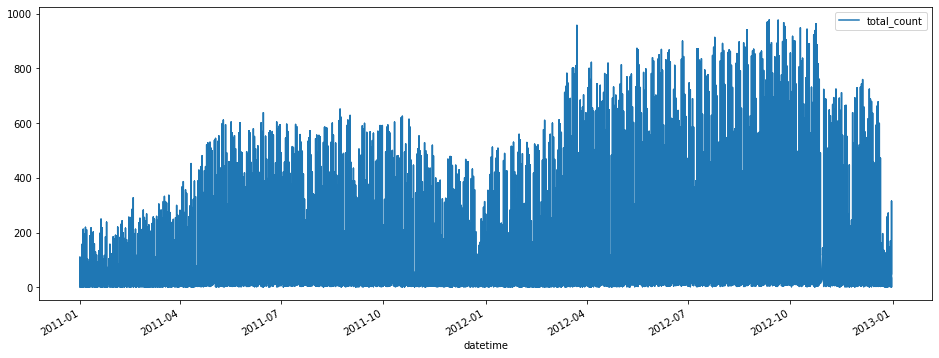

In [ ]:
df.plot(x='datetime',y='total_count')

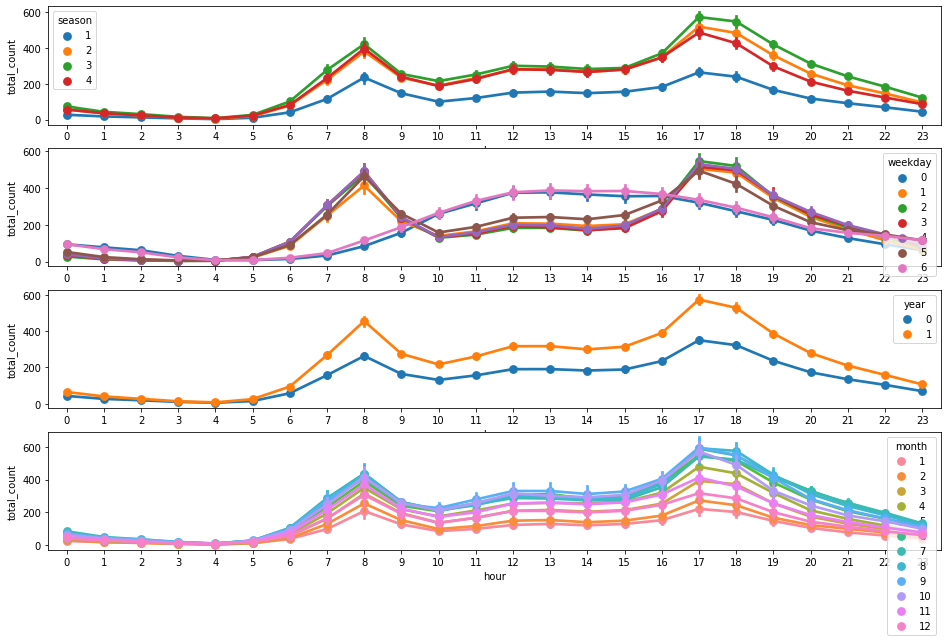

In [ ]:
fig,ax =plt.subplots(nrows=4,sharex=False,figsize=(16,10))

sns.pointplot(data=df,x='hour',y='total_count',hue='season',ax=ax[0])
sns.pointplot(data=df,x='hour',y='total_count',hue='weekday',ax=ax[1])
sns.pointplot(data=df,x='hour',y='total_count',hue='year',ax=ax[2])
sns.pointplot(data=df,x='hour',y='total_count',hue='month',ax=ax[3])

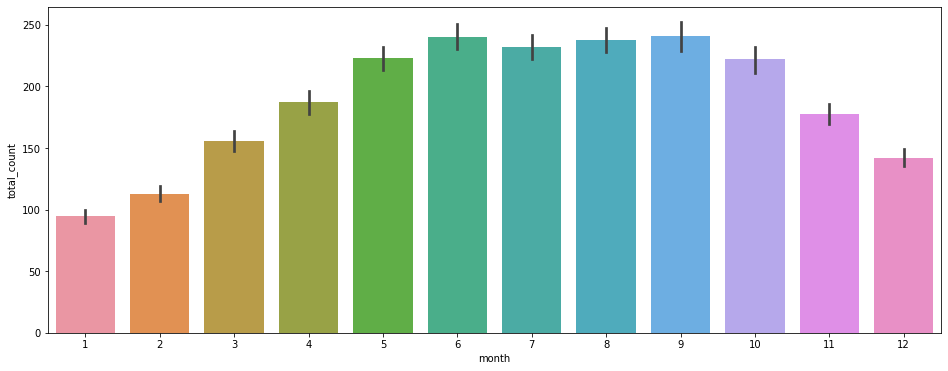

In [ ]:
fig,ax =plt.subplots()
sns.barplot(data=df,x="month",y="total_count")

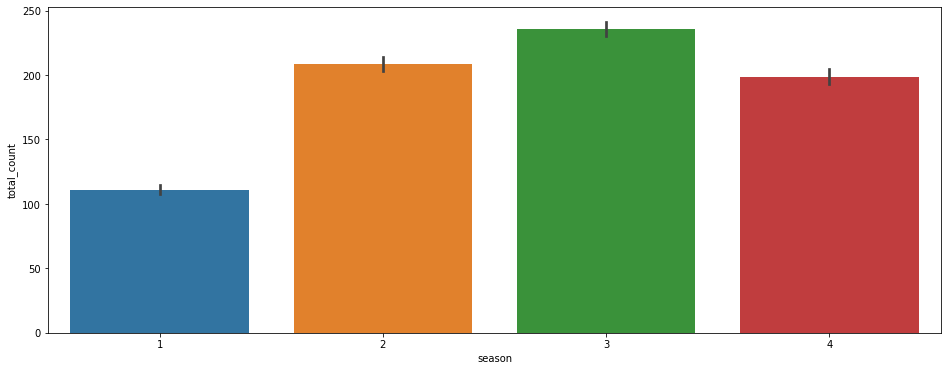

In [ ]:
fig,ax =plt.subplots()
sns.barplot(data=df,x="season",y="total_count")

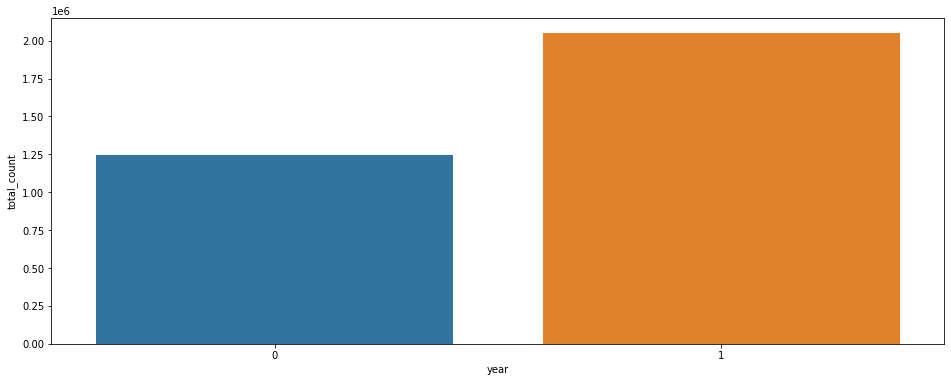

In [ ]:
fig,ax =plt.subplots()
sns.barplot(data=df,x="year",y="total_count",estimator=sum,ci=None)

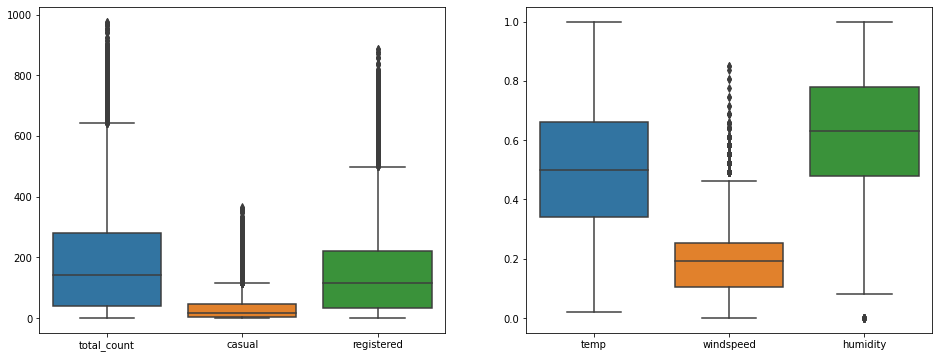

In [ ]:
fig,ax=plt.subplots(ncols=2)
sns.boxplot(data=df[['total_count','casual','registered']],ax=ax[0])
sns.boxplot(data=df[['temp','windspeed','humidity']],ax=ax[1]);

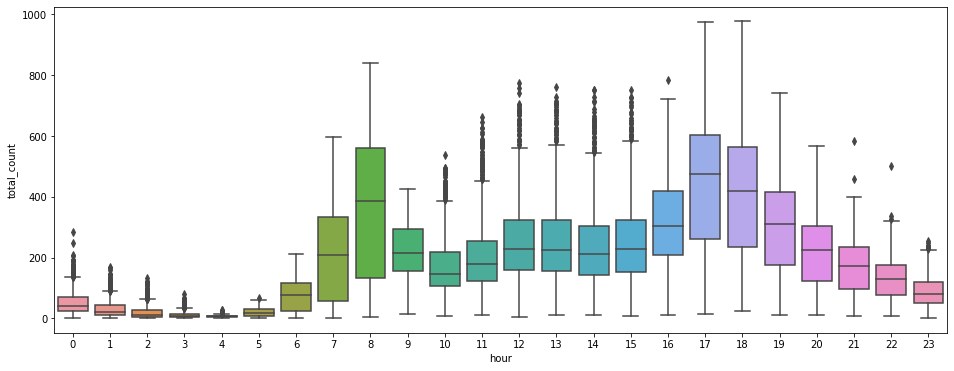

In [ ]:
fig,ax = plt.subplots()
sns.boxplot(data=df,x='hour',y='total_count')

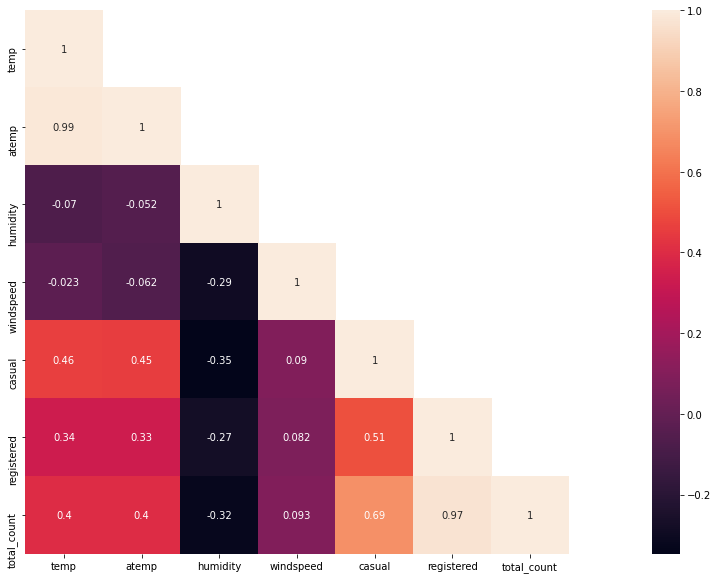

In [ ]:
plt.figure(figsize=(30,10))

corr_matrix = df[['temp','atemp','humidity','windspeed','casual','registered','total_count']].corr()

mask = np.array(corr_matrix)
mask[np.tril_indices_from(mask)] = False

sns.heatmap(corr_matrix,mask=mask,square=True,annot=True)
plt.show()

In [ ]:
df.drop(['rec_id','casual','registered','atemp','year','hour'],axis=1,inplace=True)

In [ ]:
df.head()

,datetime,season,month,is_holiday,weekday,is_workingday,weather_condition,temp,humidity,windspeed,total_count
0,2011-01-01,1,1,0,6,0,1,0.24,0.81,0.0,16
1,2011-01-01,1,1,0,6,0,1,0.22,0.80,0.0,40
2,2011-01-01,1,1,0,6,0,1,0.22,0.80,0.0,32
3,2011-01-01,1,1,0,6,0,1,0.24,0.75,0.0,13
4,2011-01-01,1,1,0,6,0,1,0.24,0.75,0.0,1


In [ ]:
df = df.groupby('datetime',as_index=False).mean()
df

,datetime,season,month,is_holiday,weekday,is_workingday,weather_condition,temp,humidity,windspeed,total_count
0,2011-01-01,1.0,1.0,0.0,6.0,0.0,1.583333,0.344167,0.805833,0.160446,41.041667
1,2011-01-02,1.0,1.0,0.0,0.0,0.0,1.956522,0.363478,0.696087,0.248539,34.826087
2,2011-01-03,1.0,1.0,0.0,1.0,1.0,1.000000,0.196364,0.437273,0.248309,61.318182
3,2011-01-04,1.0,1.0,0.0,2.0,1.0,1.043478,0.200000,0.590435,0.160296,67.913043
4,2011-01-05,1.0,1.0,0.0,3.0,1.0,1.000000,0.226957,0.436957,0.186900,69.565217
...,...,...,...,...,...,...,...,...,...,...,...
726,2012-12-27,1.0,12.0,0.0,4.0,1.0,1.666667,0.254167,0.652917,0.350133,88.083333
727,2012-12-28,1.0,12.0,0.0,5.0,1.0,1.708333,0.253333,0.590000,0.155471,128.958333
728,2012-12-29,1.0,12.0,0.0,6.0,0.0,2.041667,0.253333,0.752917,0.124383,55.875000
729,2012-12-30,1.0,12.0,0.0,0.0,0.0,1.333333,0.255833,0.483333,0.350754,74.833333


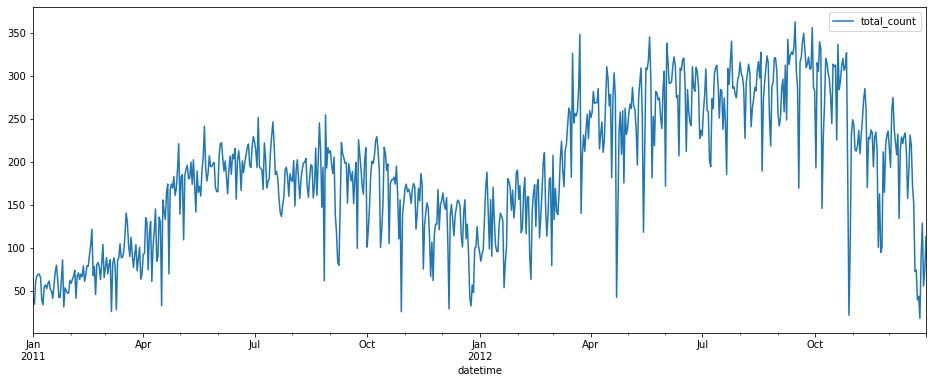

In [ ]:
df.plot(x='datetime',y='total_count')

In [ ]:
#predict the next day's demand
df['last_day'] = np.r_[df.iloc[0,-1],df.iloc[:-1,-1]]
df

,datetime,season,month,is_holiday,weekday,is_workingday,weather_condition,temp,humidity,windspeed,total_count,last_day
0,2011-01-01,1.0,1.0,0.0,6.0,0.0,1.583333,0.344167,0.805833,0.160446,41.041667,41.041667
1,2011-01-02,1.0,1.0,0.0,0.0,0.0,1.956522,0.363478,0.696087,0.248539,34.826087,41.041667
2,2011-01-03,1.0,1.0,0.0,1.0,1.0,1.000000,0.196364,0.437273,0.248309,61.318182,41.041667
3,2011-01-04,1.0,1.0,0.0,2.0,1.0,1.043478,0.200000,0.590435,0.160296,67.913043,41.041667
4,2011-01-05,1.0,1.0,0.0,3.0,1.0,1.000000,0.226957,0.436957,0.186900,69.565217,34.826087
...,...,...,...,...,...,...,...,...,...,...,...,...
726,2012-12-27,1.0,12.0,0.0,4.0,1.0,1.666667,0.254167,0.652917,0.350133,88.083333,40.000000
727,2012-12-28,1.0,12.0,0.0,5.0,1.0,1.708333,0.253333,0.590000,0.155471,128.958333,44.043478
728,2012-12-29,1.0,12.0,0.0,6.0,0.0,2.041667,0.253333,0.752917,0.124383,55.875000,18.375000
729,2012-12-30,1.0,12.0,0.0,0.0,0.0,1.333333,0.255833,0.483333,0.350754,74.833333,88.083333


In [ ]:
#90% train and 10% test
n,p = df.shape[0],0.9

df_train=df.iloc[:int(n*p),1:]
dtime_train = df.iloc[:int(n*p),0]

df_test=df.iloc[int(n*p):,1:]
dtime_test= df.iloc[int(n*p):,0]

In [ ]:
x_train = df_train.drop('total_count',axis=1)
y_train = df_train['total_count']

x_test = df_test.drop('total_count',axis=1)
y_test = df_test['total_count']

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model = RandomForestRegressor(random_state=0)
model.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
n_steps = 3
ts_pred = pd.DataFrame(y_pred)
smooth_path = ts_pred.rolling(n_steps).mean()
path_deviation = 1.96 * ts_pred.rolling(n_steps).std()
under_line = (smooth_path-path_deviation)[0]
over_line =(smooth_path+path_deviation)[0]

([<matplotlib.axis.XTick at 0x7fc07039e400>,
 <a list of 8 Text major ticklabel objects>)

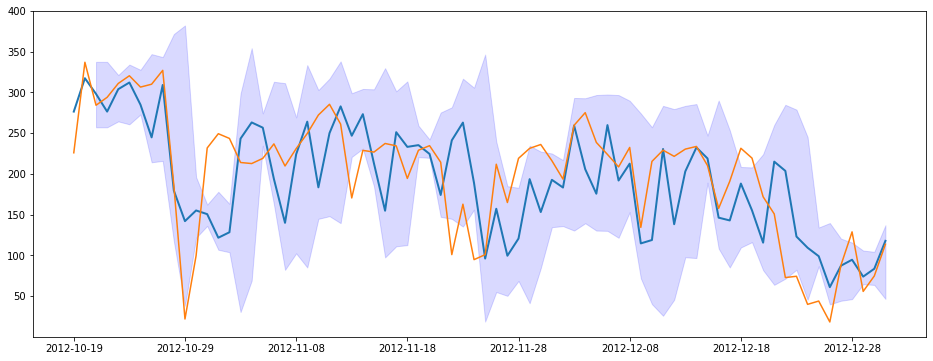

In [ ]:
plt.plot(dtime_test, y_pred, linewidth=2, label='predição')
plt.fill_between(dtime_test, under_line, over_line, color='b', alpha=.15)
plt.plot(dtime_test, y_test, label='real')
plt.xticks(dtime_test.iloc[np.arange(dtime_test.size, step= 10).astype(int)])

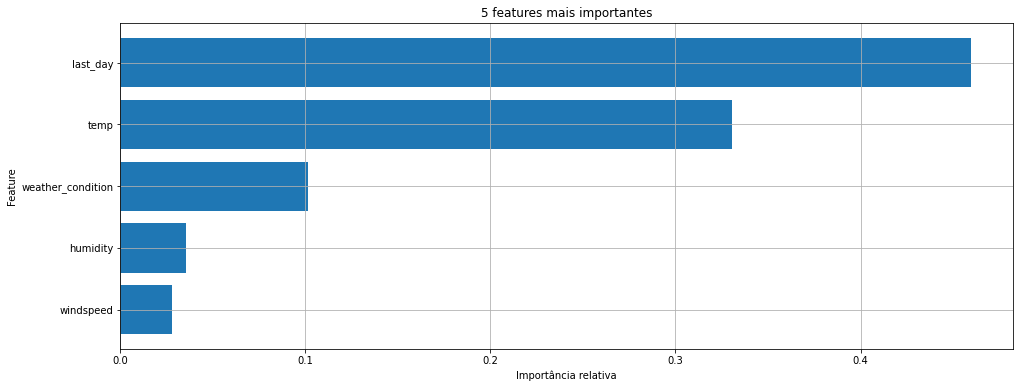

In [ ]:
fp = model.feature_importances_
n = 5
i = np.argsort(fp)[-n:]
cols = x_train.columns
plt.barh(cols[i], fp[i])
plt.grid()
plt.title(f"{n} features mais importantes")
plt.xlabel("Importância relativa")
plt.ylabel("Feature")
plt.show()